In [1]:
#特征评价关键代码
#Feature reduce - Option 1: corr with Product_RON_loss
import os
import matplotlib . pyplot as plt
import numpy as np
import pandas as pd

table_path = "../data/data_num_325_fea_reduce.csv"
pearsonr_table_path = "../data/data_num_325_fea_30_pearsonr.csv"
cv_table_path = "../data/data_num_325_fea_30_cv.csv"

In [2]:
data = pd.read_csv(table_path,index_col = 0)
y = data['Product_RON_loss']
del data['Product_RON_loss']

In [3]:
data.describe()

,Raw_S_content,Raw_RON,Raw_Saturated_hydrocarbon,Raw_Aromatics,Raw_Bromine_value,Raw_Density,Product_S_content,Spent_C,Spent_S,Recycle_C,...,S-ZORB.TE_1102.DACA,S-ZORB.AT-0001.DACA.PV,S-ZORB.AT-0003.DACA.PV,S-ZORB.FT_1204.DACA.PV,S-ZORB.FT_5102.DACA.PV,S-ZORB.CAL.LEVEL.PV,S-ZORB.FT_1006.DACA.PV,S-ZORB.FT_5204.DACA.PV,S-ZORB.FT_1503.DACA.PV,S-ZORB.FT_1504.DACA.PV
count,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,...,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000
mean,229.548904,89.733538,52.676228,21.949782,54.526661,726.755265,3.910154,3.030794,8.063265,1.507521,...,426.623764,2.547025,1.131551,51.913266,43.675943,1917.403402,4843.993930,143.854913,2190.862732,2409.550662
std,65.752227,0.889764,4.584314,1.823616,6.818416,4.262181,1.265322,1.722995,2.132002,0.966428,...,1.759060,2.684052,1.147907,18.092283,48.877772,5287.204185,2359.134691,137.450504,418.047777,452.316109
min,57.000000,87.200000,43.240000,16.822222,36.520000,715.100000,3.200000,1.010000,2.940000,0.250000,...,420.898430,0.498255,0.447884,0.889900,0.000000,-4269.455900,0.000000,0.000000,979.564940,1222.663100
25%,185.000000,89.200000,49.610000,20.690000,48.750000,724.200000,3.200000,1.850000,6.990000,0.933333,...,426.075162,0.534488,0.464989,38.945485,0.000000,78.928243,4215.424100,0.000000,1887.742875,2329.794550
50%,240.285714,89.800000,53.250000,21.890000,53.980000,726.300000,3.200000,2.390000,8.400000,1.280000,...,427.171300,0.555710,0.472675,51.672012,64.004581,80.502553,5094.966775,142.936557,2177.557700,2538.538450
75%,271.428571,90.300000,56.100000,23.300000,60.190000,729.500000,4.200000,3.610000,9.370000,1.670000,...,427.171300,5.123928,1.391713,62.998978,67.964399,84.508473,6129.741900,203.804645,2496.749950,2702.628700
max,392.000000,91.700000,63.400000,26.200000,70.500000,738.700000,8.600000,9.090000,14.310000,5.190000,...,432.095332,7.155496,4.493657,106.657364,227.282440,18433.389250,11320.456750,589.154615,3334.904725,3104.564825


In [4]:
features = data.columns.values.tolist()

In [5]:
# CV ranking
cv_feature_importance = [( column, np. std ( data [column])/abs(np.mean(data[column]))) for column in features ]
cv_feature_importance.sort (key=lambda x: x [1], reverse =True)
cv_sorted_attrs = [item[0] for item in cv_feature_importance ]
cv_ranking = [ cv_sorted_attrs . index(x) + 1 for x in features ]
print ("# CV result")
# print (cv_ranking)
# print ( cv_feature_importance )

# CV result


In [6]:
cv_feature_sort = []
cv_feature_score = []
for i in range(0, len(cv_feature_importance)):
    cv_feature_sort.append(cv_feature_importance[i][0])
    cv_feature_score.append(cv_feature_importance[i][1])

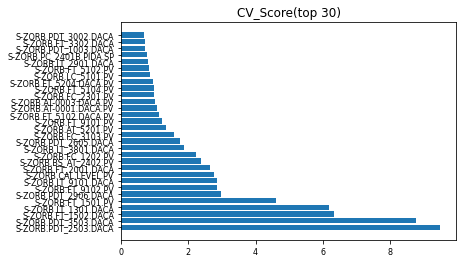

In [7]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
plt.title('CV_Score(top 30)')
plt.rcParams['figure.figsize'] = (10, 8.0) # 设置figure_size尺寸
plt.barh(cv_feature_sort[0:30], cv_feature_score[0:30],tick_label = cv_feature_sort[0:30])

plt.tick_params(labelsize=8)
plt.show()

In [8]:
data_save_cv = data[cv_feature_sort[0:30]]
data_save_cv['Product_RON_loss'] = y
data_save_cv.to_csv(cv_table_path)

<ipython-input-8-5a114a85571b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_save_cv['Product_RON_loss'] = y


In [9]:
#y_values = data [ target ]
from scipy.stats import pearsonr
y_values = y
pearsonr_feature_impotance = [( column, pearsonr ( data[column], y_values) [0]) for column in features ]
pearsonr_feature_impotance . sort (key=lambda x: abs(x [1]) , reverse =True)
pearson_sorted_attrs = [item[0] for item in pearsonr_feature_impotance ]
pearson_ranking = [ pearson_sorted_attrs . index(x) + 1 for x in features ]
print ("# Pearson result")
# print (pearson_ranking)
# print ( pearsonr_feature_impotance )

# Pearson result


In [10]:
pearsonr_feature_impotance[0][0]

'S-ZORB.TC_2801.PV'

In [11]:
pearsonr_feature_sort = []
pearsonr_feature_score = []
for i in range(0, len(pearsonr_feature_impotance)):
    pearsonr_feature_sort.append(pearsonr_feature_impotance[i][0])
    pearsonr_feature_score.append(pearsonr_feature_impotance[i][1])

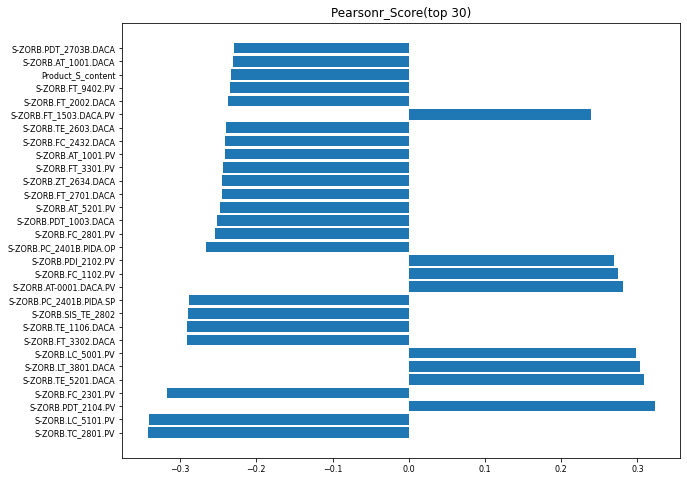

In [12]:
plt.title('Pearsonr_Score(top 30)')
plt.rcParams['figure.figsize'] = (10, 8.0) # 设置figure_size尺寸
plt.barh(pearsonr_feature_sort[0:30], pearsonr_feature_score[0:30],tick_label = pearsonr_feature_sort[0:30])

plt.tick_params(labelsize=8)
plt.show()

In [13]:
X_pearsonr = data[pearsonr_feature_sort[0:30]]
X_pearsonr

,S-ZORB.TC_2801.PV,S-ZORB.LC_5101.PV,S-ZORB.PDT_2104.PV,S-ZORB.FC_2301.PV,S-ZORB.TE_5201.DACA,S-ZORB.LT_3801.DACA,S-ZORB.LC_5001.PV,S-ZORB.FT_3302.DACA,S-ZORB.TE_1106.DACA,S-ZORB.SIS_TE_2802,...,S-ZORB.FT_3301.PV,S-ZORB.AT_1001.PV,S-ZORB.FC_2432.DACA,S-ZORB.TE_2603.DACA,S-ZORB.FT_1503.DACA.PV,S-ZORB.FT_2002.DACA,S-ZORB.FT_9402.PV,Product_S_content,S-ZORB.AT_1001.DACA,S-ZORB.PDT_2703B.DACA
0,272.367985,49.916519,101.290580,0.000000,44.920345,1.246513,55.011076,11.267226,133.680820,273.237180,...,92.388075,187.144500,9.642346,369.347225,2216.40935,37.790666,200.153495,3.2,130.358250,-1.601619
1,281.072710,49.955209,101.544925,0.000000,49.961387,0.992477,54.996157,11.267508,133.824785,282.043645,...,74.366110,187.144500,11.367705,379.786200,2370.58740,36.819709,235.562625,3.2,139.992470,-1.503004
2,272.924330,50.215176,101.618320,0.000000,49.754584,1.089546,55.021893,11.267558,133.459220,274.166670,...,146.156760,187.144500,16.276755,401.446240,2326.46535,37.294151,242.433310,3.2,139.878080,-1.473945
3,269.141545,49.877925,105.029760,0.000000,50.039984,1.364642,55.041748,11.267978,136.293350,270.070205,...,88.360856,187.144500,12.471198,375.156435,2495.22360,36.893098,204.191170,3.2,127.938755,-1.319147
4,267.033390,49.900563,105.937455,0.000000,49.900836,1.034412,55.026846,11.267661,136.403490,268.022000,...,186.439789,187.144500,9.677949,399.719460,2807.78910,37.298072,319.425080,3.2,128.254285,-1.409514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,290.046320,598.017788,52.717846,126.887476,44.431741,0.025413,50.009071,933.233200,150.675583,281.829207,...,575.819775,225.020775,23.414039,475.033497,2177.55770,386.978275,767.891845,3.2,225.020775,-1.043712
321,286.308350,568.550955,54.426241,152.302148,47.705298,0.077742,49.977052,933.233200,149.727317,278.364843,...,371.761690,224.013005,28.572620,452.243055,2177.55770,386.554050,574.597438,3.2,224.013005,-0.830020
322,288.879765,626.531005,54.764742,144.639408,48.597363,-0.014480,50.104367,933.233200,149.604590,281.358248,...,484.850683,213.336115,25.077859,468.798245,2177.55770,384.629933,561.281330,3.2,213.336115,-1.004785
323,284.760735,629.323360,55.948335,59.778301,47.845586,-0.094022,50.037513,933.233200,150.087508,274.248608,...,533.892527,208.649452,25.695818,476.055835,2177.55770,387.263090,717.726935,3.6,208.649452,-0.987180


In [14]:
X_pearsonr['Product_RON_loss'] = y
X_pearsonr.to_csv(pearsonr_table_path)
print("save reduced features to", pearsonr_table_path)

save reduced features to ../data/data_num_325_fea_30_pearsonr.csv


<ipython-input-14-9bb76f39c905>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_pearsonr['Product_RON_loss'] = y
